<a href="https://colab.research.google.com/github/Razaqa-Aliskar/DSPL-Streamlit-App/blob/main/Dspl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd

In [25]:
df=pd.read_csv('poverty_lka.csv')

In [26]:
df.head(5)

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Sri Lanka,LKA,2019,Income share held by second 20%,SI.DST.02ND.20,11.1
2,Sri Lanka,LKA,2016,Income share held by second 20%,SI.DST.02ND.20,10.8
3,Sri Lanka,LKA,2012,Income share held by second 20%,SI.DST.02ND.20,11
4,Sri Lanka,LKA,2009,Income share held by second 20%,SI.DST.02ND.20,11.6


Checking For Outliers

In [27]:
#find missing value
df.isnull().sum()

,0
Country Name,0
Country ISO3,0
Year,0
Indicator Name,0
Indicator Code,0
Value,0


Dropping Irrelevant Columns

In [28]:
#drop columns
df.drop(['Country Name','Country ISO3'],axis=1,inplace=True)

In [29]:
df.head(5)

,Year,Indicator Name,Indicator Code,Value
0,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,2019,Income share held by second 20%,SI.DST.02ND.20,11.1
2,2016,Income share held by second 20%,SI.DST.02ND.20,10.8
3,2012,Income share held by second 20%,SI.DST.02ND.20,11
4,2009,Income share held by second 20%,SI.DST.02ND.20,11.6


In [30]:
#Find duplicates
df.duplicated().sum()

np.int64(0)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            160 non-null    object
 1   Indicator Name  160 non-null    object
 2   Indicator Code  160 non-null    object
 3   Value           160 non-null    object
dtypes: object(4)
memory usage: 5.1+ KB


In [32]:
#find outliers
df.describe()

,Year,Indicator Name,Indicator Code,Value
count,160,160,160,160
unique,10,29,29,145
top,2019,Income share held by second 20%,SI.DST.02ND.20,3
freq,25,9,9,4


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            160 non-null    object
 1   Indicator Name  160 non-null    object
 2   Indicator Code  160 non-null    object
 3   Value           160 non-null    object
dtypes: object(4)
memory usage: 5.1+ KB


In [34]:
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df.describe()

,Value
count,159.000000
mean,20.605826
std,19.046552
min,0.008900
25%,6.400000
50%,14.400000
75%,32.450000
max,87.600000


In [35]:
#show the meta row
df.iloc[0]

,0
Year,#date+year
Indicator Name,#indicator+name
Indicator Code,#indicator+code
Value,NaN


In [36]:
#delete the meta row
df = df.drop(df.index[0])

In [37]:
df

,Year,Indicator Name,Indicator Code,Value
1,2019,Income share held by second 20%,SI.DST.02ND.20,11.10000
2,2016,Income share held by second 20%,SI.DST.02ND.20,10.80000
3,2012,Income share held by second 20%,SI.DST.02ND.20,11.00000
4,2009,Income share held by second 20%,SI.DST.02ND.20,11.60000
5,2006,Income share held by second 20%,SI.DST.02ND.20,10.70000
...,...,...,...,...
155,2019,Multidimensional poverty intensity (average sh...,SI.POV.MDIM.IT,41.60000
156,2016,Multidimensional poverty intensity (average sh...,SI.POV.MDIM.IT,37.51000
157,2016,"Multidimensional poverty headcount ratio, male...",SI.POV.MDIM.MA,2.26367
158,2019,Multidimensional poverty index (scale 0-1),SI.POV.MDIM.XQ,0.06700


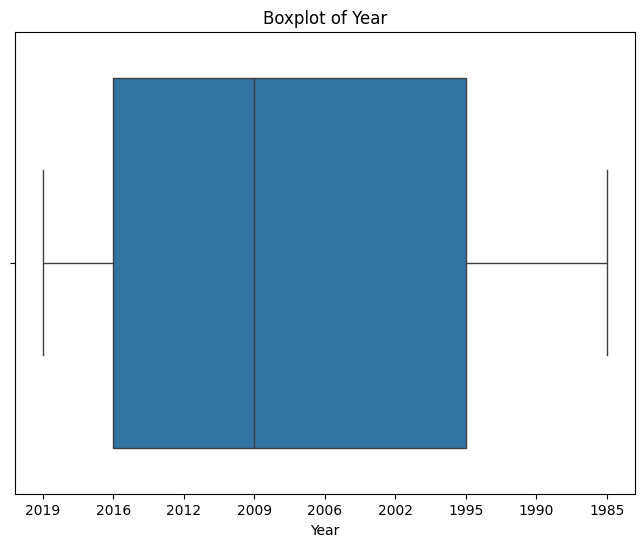

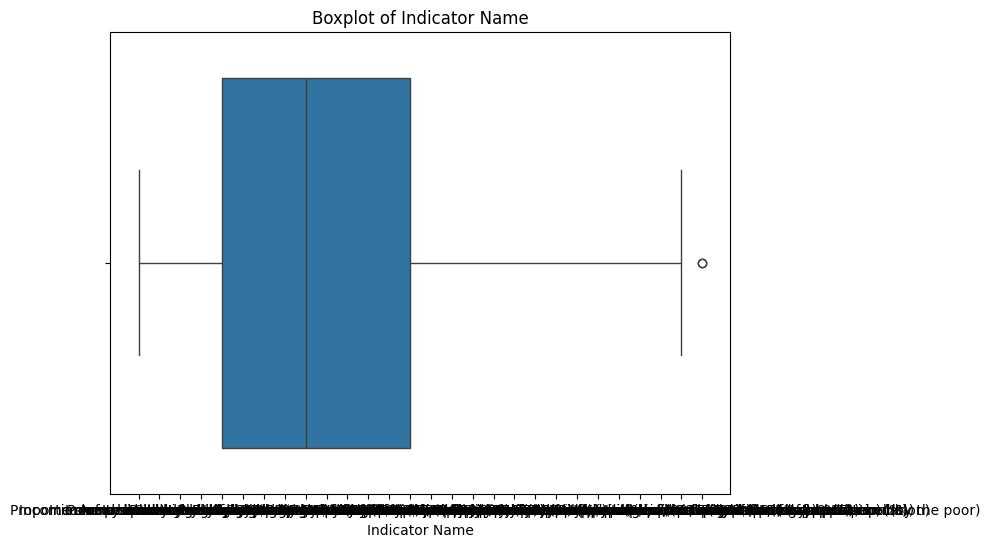

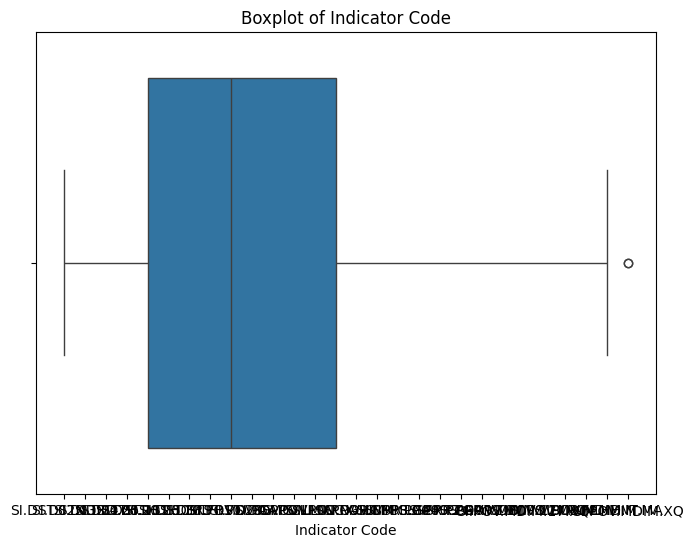

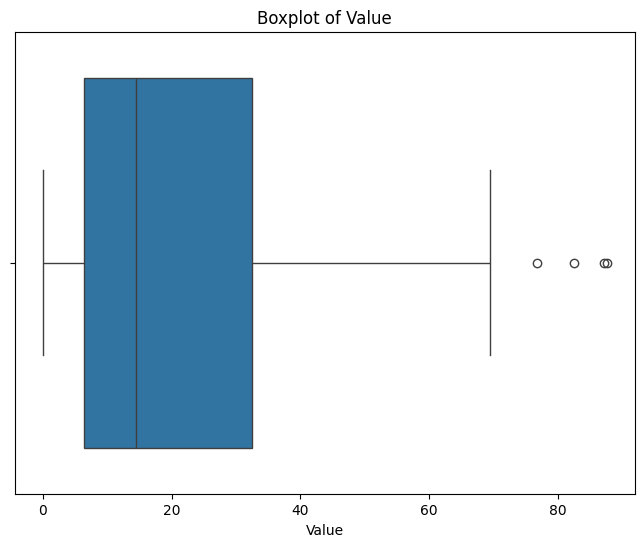

In [38]:
#Box plots to show the outliers in each column
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.show()

In [39]:
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]
  return outliers

In [40]:
outliers = find_outliers_IQR(df['Value'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 4


,Value
129,76.8
130,82.5
131,87.2
132,87.6


In [41]:
#save it in a csv file
df.to_csv('poverty_lka_cleaned.csv', index=False)